<a href="https://colab.research.google.com/github/jugernaut/Prometeo/blob/desarrollo/04_M%C3%A9todosNum%C3%A9ricos/03_DiferenciasFinitas/01_DiferenciasFinitasLaplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicación de Diferencias Finitas
### Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101019
*   Autores: 
    - Ingrid Pamela Ruiz Puga

*   Rev: jue may 27 12:23:01 CST 2021

Este sitio puede ser usado libremente, tanto por profesores como por estudiantes, que deseen complementar sus cursos y conocimientos en los temas antes mencionados. Los materiales están bajo una Licencia Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />Esta obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Licencia Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>.

Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101019

In [ ]:
# COLAB
!git clone https://github.com/jugernaut/Prometeo.git #rama  master
#!git clone --branch desarrollo https://github.com/jugernaut/Prometeo.git #rama desarrollo 
import Prometeo.Utils.gutils as vis

# Linux, MacOS y windows
import os, sys
sys.path.insert(0, os.path.abspath('../../'))
#import Utils.gutils as vis

import numpy as np
import pandas as pd

Cloning into 'Prometeo.gitb'...
fatal: could not read Username for 'https://github.com': No such device or address
Cloning into 'Prometeo'...
remote: Enumerating objects: 2540, done.
remote: Counting objects: 100% (475/475), done.
remote: Compressing objects: 100% (454/454), done.
remote: Total 2540 (delta 232), reused 0 (delta 0), pack-reused 2065
Receiving objects: 100% (2540/2540), 22.46 MiB | 24.23 MiB/s, done.
Resolving deltas: 100% (1557/1557), done.


## Introducción

Una ecuación en derivadas parciales es una relación entre una función de dos o mas variables y algunas de sus derivadas parciales (si la función es de una sola variable una relación de este tipo es una ecuación diferencial ordinaria). Resolver una ecuación de este tipo significa idealmente encontrar las funciones que la cumplen, tal vez bajo ciertas condiciones adicionales, o en caso de que no se pueda dar la mayor información posible sobre como son estas funciones.

Se dará solución a la ecuación de Laplace es una ecuación en derivadas parciales de segundo orden de tipo elíptico, que recibe ese nombre en honor al físico y matemático Pierre-Simon Laplace.

Introducida por las necesidades de la mecánica newtoniana, la ecuación de Laplace aparece en muchas otras ramas de la física teórica como la astronomía, la electrostática, la mecánica de fluidos o la mecánica cuántica. 


La ecuación de Laplace es la siguiente:

$$ F(x,y) = f_{xx} + f_{yy}$$

Se solucionará la ecuación con el objetivo de observar la difusión de calor en una placa dada una fuente como la siguiente:
<center>
<img src="https://github.com/jugernaut/Prometeo/blob/desarrollo/Figuras/dif1.PNG?raw=1" width="500">
</center>

La solución exacta a la ecuación es la siguiente, en la cual se observa como se distribuye el calor en una placa.

<center>
<img src="https://github.com/jugernaut/Prometeo/blob/desarrollo/Figuras/dif2.PNG?raw=1" width="500">
</center>

Se le dará solución a esta ecuación parcial por el método de diferencias finitas, el cual recordaremos brevemente:

El Método de Diferencias Finitas es un método de carácter general que permite la resolución aproximada de ecuaciones diferenciales en derivadas parciales definidas en espacios finitos. Es de una gran sencillez conceptual y constituye un procedimiento muy adecuado para la resolución de una ecuación bidimensional como la que hemos planteado.

El primer paso para la aplicación del método consiste en discretizar el plano en el que se quiere resolver la ecuación con una malla, por conveniencia cuadrada. Los puntos de la malla están separados una distancia $h$ en ambas direcciones $x$ e $y$.

De modo que el valor de la temperatura en un punto se puede escribir como la media de las temperaturas de los 4 puntos vecinos.

Otro aspecto importante es que las diferencias finitas aproximan cocientes diferenciales a medida que $h$ se acerca a cero. Así que se pueden usar diferencias finitas para aproximar derivadas. Esta técnica se emplea a menudo en análisis numérico, especialmente en ecuaciones diferenciales numéricas ordinarias, ecuaciones en diferencias y ecuación en derivadas parciales. Los métodos resultantes reciben el nombre de métodos de diferencias finitas.

Las aplicaciones habituales de los métodos de diferencias finitas son en los campos de la computación y áreas de la ingeniería como ingeniería térmica o mecánica de fluidos.








##Metodología

Considerando la ecuación de Laplace para resolver nuestro problema sobre temperaturas en una placa, procederemos a resolver la ecuación diferencia por diferencias finitas, resolver el sistema por algún método directo e iterativo para posteriormente poder visualizar como se transfiere el calor en la placa. Una vez resumido el proceso que haremos para darle solución a nuestro problema, describiremos más a detalle cada etapa. 

El método que utilizaremos hara uso de la serie de Taylor:

$$f(a)+\frac{f'(a)}{1!}(x-a)+\frac{f''(a)}{2!}(x-a)^2+\frac{f^{(3)}(a)}{3!}(x-a)^3+\cdots$$

Posteriormente nos quedará de la siguiente manera:

$${\displaystyle f''(x)\approx ={\frac {f(i+1,j)-2f(ij)+f(i-1j)}{\Delta x^{2}}}}$$

$${\displaystyle f''(y)\approx ={\frac {f(j+1,i)-2f(ij)+f(j-1,i)}{\Delta y^{2}}}}$$
Por lo que al sumarla y realizar algunos pasos algebraicos obtenemos que al resolver la ecuación de Laplace utilizando el método de diferencias finitas el resultado es la siguiente expresión:

$$ f_{i+1,j} + \beta ^2 f_{i,j+1} + f_{i-1,j} \beta^2 f_{i,j-1} -2(1+\beta^2)f_{i,j} = 0$$

### Condiciones de frontera
Tenemos una placa de 3 unidades de ancho (eje x) y 2 unidades de alto (eje y) para la cual se definen los siguientes las siguientes condiciones de frontera:

Considerando las siguientes condiciones de frontera:
$$x =0, T = 100y$$
$$x =3, T = 250y$$
$$y =0, T = 0$$
$$y = 2, T = 200 + (100/3)x^2$$

Cabe notar que estas condiciones podrían ser distintas, pues estamos definiendo la temperatura en los bordes de nuestra placa, de modo que nuestras condiciones iniciales nos indican el valor de la temperatura en estos puntos inicialmente y veremos como se distribuirá.

Agregamos las funciones que evaluen las condiciones de frontera.

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import seaborn as sb

In [ ]:
#Condiciones de frontera
def front_arriba(x):
    return 200+((100/3)* (x**2))

def front_abajo(x):
    return np.zeros(len(x))

def front_derecha(y):
    return 250*y

def front_izquierda(y):
    return 100*y

yn = 2
xn = 3
deltax = 3/4
deltay = 2/4

x = np.arange(deltax, xn, deltax)
y = np.arange(deltay, yn, deltay)
izquierda = front_izquierda(y)
derecha = front_derecha(y)
abajo = front_abajo(x)
arriba = front_arriba(x)


### Discretización (malla)

Para este primer ejemplo usaremos una malla de 3x3, de la cual conseguimos que nuestras $\Delta_x = 3/4$ y $\Delta_y = 2/4$ para obtener 9 nodos a calcular su temperatura. La malla es la siguiente:

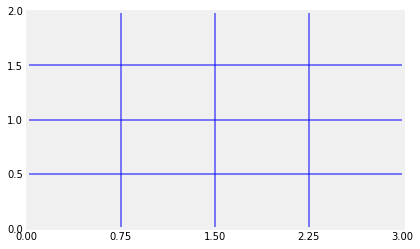

In [ ]:
def malla(x1,xn,y1,yn, deltax, deltay):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    major_ticksx = np.arange(x1, xn+deltax, deltax)
    major_ticksy = np.arange(y1, yn+deltay, deltay)

    ax.set_xticks(major_ticksx)
    ax.set_yticks(major_ticksy)
    ax.grid(which='major', alpha=0.5,color='b', linewidth=2) #, linestyle='dotted'

    plt.show()

malla(0,3,0,2, 3/4, 2/4)

### Sistema de ecuaciones
El sistema de ecuaciones se realizará mediante la solución encontrada por diferencias finitas para la ecuación de Laplace. La forma de caminar entre los nodos será se abajo hacia arriba comenzando por el lado izquierdo, por lo tanto, se tomará los nodos como en el siguiente ejemplo:

<center>
<img src="https://github.com/jugernaut/Prometeo/blob/desarrollo/Figuras/dif3.PNG?raw=1" width="500">
</center>

Hay que destacar que la manera de "caminar" en los nodos puede ser la elegida por el autor, siguiendo cierto orden.

De modoque dado nuestra forma de seleccionar los nodos, el sistema de ecuaciones queda de la siguiente manera:

$$x_{4} + \beta^{2} x_{2} + 50 +\beta^2 0 - 2\left(1+B^{2}\right) x_{1}=0$$
$$x_{5}+\beta^{2} x_{3}+100+ \beta^2 x_{1} - 2\left(1+\beta^{2}\right) x_{2}=0$$
$$x_{6}+\beta^{2} 218.75 +150 +\beta^{2} x_{2} - 2\left(1+\beta^{2}\right) x_{3}=0$$
$$x_{7}+\beta^{2} x_{5} + x_{1} +\beta^{2} 0 - 2\left(1+\beta^{2}\right) x_{4}=0$$
$$x_{8}+\beta^{2} x_{6} + x_{2} +\beta^{2}x_{4} - 2\left(1+\beta^{2}\right) x_{5}=0$$
$$x_{9}+\beta^{2} 275 + x_{3} +\beta^{2}x_{5} - 2\left(1+\beta^{2}\right) x_{6}=0$$
$$125+\beta^{2} x_{8} + x_{4} +\beta^{2}0 - 2\left(1+\beta^{2}\right) x_{7}=0$$

$$\vdots $$
$$375+\beta^{2}368.75+x_{5}+\beta^{2} x_{8} - 2\left(1+\beta^{2}\right)x_{9}=0$$

Y por lo tanto nuestra matriz general queda de la siguiente manera
\begin{equation}

\begin{pmatrix}
-2(1+\beta^2) & 1                             & 0                             & \beta^2        & 0                             & 0                             & 0                             & 0                             & 0                             \\
1                             & -2(1+\beta^2) & 1                             & 0                             & \beta^2        & 0                             & 0                             & 0                             & 0                             \\
0                             & 1                             & -2(1+\beta^2) & 0                             & 0                             & \beta^2       & 0                             & 0                             & 0                             \\
\beta^2        & 0                             & 0                             & -2(1+\beta^2) & 1                             & 0                             & \beta^2        & 0                             & 0                             \\
0                             & \beta^2        & 0                             & 1                             & -2(1+\beta^2) & 1                             & 0                             & \beta^2        & 0                             \\
0                             & 0                             & \beta^2        & 0                             & 1                             & -2(1+\beta^2) & 0                             & 0                             & \beta^2        \\
0                             & 0                             & 0                             & \beta^2        & 0                             & 0                             & -2(1+\beta^2) & 1                             & 0                             \\
0                             & 0                             & 0                             & 0                             & \beta^2        & 0                             & 1                             & -2(1+\beta^2) & 1                             \\
0                             & 0                             & 0                             & 0                             & 0                             & \beta^2        & 0                             & 1                             & -2(1+\beta^2)
\end{pmatrix}
\end{equation}

Y el vector de términos independientes del sistema de ecuaciones se construye despejando cada una de nuestras ecuaciones y dejando el término independiente del otro lado de la igualdad, lo cual nos da el siguiente vector:
\begin{equation}
\vec{b}=
\begin{pmatrix}
-50\\  
-100\\ 
-642.1875\\
0\\
0\\
-618.75\\
-125\\
-250\\
-1204.6875\\
\end{pmatrix}
\end{equation}

De modo que obtenemos un sistema de la forma $A \vec{x} = \vec{b}$


#### Creando matriz y vector

In [ ]:
# Definimos el sistema de ecuaciones (caminando de arriba-abajo y de izquierda-derecha)
def sist(deltax, deltay,n,numreg):
    beta = deltax/deltay
    m = np.zeros((n,n))
    for i in range(m.shape[0]):
            if i+numreg<(n):
                m[i,i+numreg] = 1
            if i%numreg != 0:
                m[i,i-1] = beta**2
            if i-numreg>=0:
                m[i,i-numreg] = 1
            if i%numreg != (numreg-1) >0:
                m[i,i+1] = beta**2
            m[i,i]=-2*(1+(beta**2))
    return m
  
sist(3/4, 2/4,9,3) 

array([[-6.5 ,  2.25,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 2.25, -6.5 ,  2.25,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  2.25, -6.5 ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ],
       [ 1.  ,  0.  ,  0.  , -6.5 ,  2.25,  0.  ,  1.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ,  2.25, -6.5 ,  2.25,  0.  ,  1.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  ,  0.  ,  2.25, -6.5 ,  0.  ,  0.  ,  1.  ],
       [ 0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  , -6.5 ,  2.25,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  2.25, -6.5 ,  2.25],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  2.25, -6.5 ]])

In [ ]:
#Despejando terminos independientes (vector b)
def vector(n, y0, arriba, abajo, izquierda, derecha, deltax, deltay):
    beta = deltax/deltay
    arriba = np.array(arriba)*(beta**2)
    abajo = np.array(abajo)*(beta**2)
    v=np.zeros(n)
    v[0]=-abajo[0]-izquierda[0]
    for i in range(1,(len(izquierda)-1)):
        v[i] = -izquierda[i]
    for m in range((n-(len(derecha)-1)),n):
        v[m] = -derecha[m+1-(n-(len(derecha)-1))]
    for j in range(1,len(arriba)-1):
        v[(j*y0)+y0-1] = -arriba[j]
    for k in range(1,len(abajo)-1):
        v[(k*y0)] = -abajo[k]
    v[len(izquierda)-1]=-arriba[0]-izquierda[-1]
    v[n-len(derecha)]=-abajo[-1]-derecha[0]
    v[-1]=-arriba[-1]-derecha[-1]
    return v

vector(9, 3, arriba, abajo, izquierda, derecha, deltax, deltay)

array([  -50.    ,  -100.    ,  -642.1875,    -0.    ,     0.    ,
        -618.75  ,  -125.    ,  -250.    , -1204.6875])

### Solución al sistema

Podemos solucionar el sistema con los métodos vistos en otros notebooks: Métodos directos y los iterativos. Por lo que como ejercicio probaremos ambas soluciones.

#### Método directo

Para el método directo, haremos uso del método de Gauss. Si quieres prender un poco más acerca de este método puedes visitar el [notebook de Sistemas lineales](https://github.com/jugernaut/Prometeo/blob/desarrollo/02_AlgebraLineal/07_SistemasLineales/07_SistemasLineales.ipynb).

In [ ]:
#Método de Gauss para solucionar sistema de ecuaciones
def gauss(matriz):
    m=np.zeros([matriz.shape[0], matriz.shape[1]])
    for j in range(matriz.shape[1]):
        for i in range(matriz.shape[0]):
            if matriz[i,i]!=0.0:
                if i>j:
                    norm=matriz[i,j]/matriz[j,j]
                    for k in range(matriz.shape[1]):
                        matriz[i][k]=matriz[i][k]-(norm*matriz[j][k])
            else: 
                matriz[i,:], matriz[i-1,:]=matriz[i-1,:],matriz[i,:]
                                
    v = [0]*matriz.shape[0]
    for i in range(matriz.shape[0],0,-1):
	    suma=0
	    for j in range(i,matriz.shape[0]):
		    suma=suma+matriz[i-1][j]*v[j]
	    v[i-1]=((matriz[i-1][matriz.shape[0]]-suma)/matriz[i-1][i-1])	
    return(v)

In [ ]:
# Probamos y observamos la solución
v = vector(9, 3, arriba, abajo, izquierda, derecha, 3/4, 2/4)
m=sist(3/4, 2/4,9,3) 
m=np.hstack((m,np.atleast_2d(v).T))
gauss(m)

[60.93089804521082,
 119.77067461292704,
 173.7996868650866,
 76.56681941478443,
 150.36556893585654,
 218.026446743977,
 98.43089804521084,
 194.77067461292708,
 286.29968686508664]

####Método iterativo

Usaremos el método de Gauss-Seidel para comparar los resultados, para aprender un poco más sobre Gauss-Seidel puedes revisar el siguiente [notebook de Metodos iterativos](https://github.com/jugernaut/Prometeo/blob/desarrollo/04_M%C3%A9todosNum%C3%A9ricos/01_M%C3%A9todosIterativos/01_MetodosIterativos.ipynb).

In [ ]:
#Coeficientes del sistema
def coeficientes(A,b):
    S = np.zeros([A.shape[0], A.shape[1]+1])
    W = np.copy(A)-np.diag(np.diag(A))
    for i in range(A.shape[0]):
        S[i][0]=b[i]/np.diag(A)[i]
    for i in range(S.shape[0]):
        for j in range(1,S.shape[1]):
            S[i][j]=-W[i][j-1]/np.diag(A)[i]
    return S

#Sustitucion de la ecuación 
def ecuacion(C,var,r):
    v=0
    for i in range(1,C.shape[1]):
        v+=(C[r][i]*var[i-1])
    v=v+C[r][0]
    return v

#Solución con el metodo iterativo
def GaussSeidel(C, var, iteraciones):
    global resultado
    global p
    if p < iteraciones:
        val=[]
        for i in  range(C.shape[0]):
            t=ecuacion(C,var,i)
            val.append(t)
            var[i]=t
        p+=1
        resultado=val
        GaussSeidel(C, val, iteraciones)

In [ ]:
#Probamos método con 50 iteraciones
#Creamos la matriz
A =sist(3/4, 2/4,9,3)
b = vector(9, 3, arriba, abajo, izquierda, derecha, 3/4, 2/4)
resultado=[]
var = np.array([0.0, 0.0 ,0.0,0.0, 0.0 ,0.0,0.0, 0.0 ,0.0 ])
C = coeficientes(A,b)

#Inicio de iteraciones
p = 0

#Numero de iteraciones
iteraciones = 50
GaussSeidel(C, var , iteraciones)
np.array(resultado)

array([ 60.93089805, 119.77067461, 173.79968687,  76.56681941,
       150.36556894, 218.02644674,  98.43089805, 194.77067461,
       286.29968687])

### Resultados

Ordenaremos los resultados de la placa para que pueda ser sencillo su visualización en una gráfica de calor.

In [ ]:
#Ordenamos los resultados de la placa
def ordenamosplaca(sol, rows,columns , izquierda,derecha,arriba, abajo):
    res = sol.copy()
    #print(res != sol and res!=[])
    solucion_dif = np.zeros((rows,columns))

    for i in range(columns):
        for j in range(rows)[::-1]:
            solucion_dif[j,i] = res.pop(0)

    solucion_dif=np.column_stack((solucion_dif,derecha))
    solucion_dif = np.column_stack((izquierda,solucion_dif))
    solucion_dif = np.vstack((arriba,solucion_dif))
    solucion_dif = np.vstack((solucion_dif,abajo))

    return solucion_dif

#Discretizacion
yn = 2
xn = 3

#Puntos iniciales
y1 = 0
x1 = 0
deltax = 3/4
deltay = 2/4

x = np.arange(x1, xn+ deltax, deltax)
y = np.arange(y1, yn+deltay, deltay)
izquierda_full = izquierda[::-1]
derecha_full = derecha[::-1]
abajo = front_abajo(x)
arriba = front_arriba(x)

#Numero de columnas
y0=3

#Numero de fias
x0=3

ordenamosplaca(resultado, x0, y0, izquierda_full,derecha_full,arriba, abajo )

array([[200.        , 218.75      , 275.        , 368.75      ,
        500.        ],
       [150.        , 173.79968687, 218.02644674, 286.29968687,
        375.        ],
       [100.        , 119.77067461, 150.36556894, 194.77067461,
        250.        ],
       [ 50.        ,  60.93089805,  76.56681941,  98.43089805,
        125.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ]])

#### Gráficas

Para poder visualizar la solución del sistema de ecuaciones ya ordenado haremos algunas gráficas que nos permitan apreciar la transferencia de calor según las condiciones de frontera.

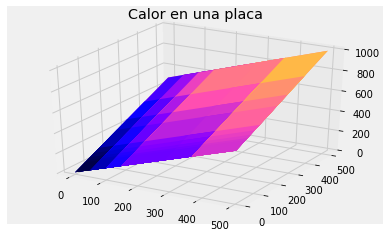

In [ ]:
#Funcion para graficar la placa en 3D
def plot_placa(sol):
    #x = np.outer(np.linspace(-2, 2, 30), np.ones(30))
    x = sol
    y = x.copy().T # transpose
    x, y = np.meshgrid(x, y)
    z = x + y

    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.plot_surface(x, y, z,cmap='gnuplot2', edgecolor='none')
    ax.set_title('Calor en una placa')
    plt.show()

plot_placa(ordenamosplaca(resultado, y0, y0, izquierda_full,derecha_full,arriba, abajo ))

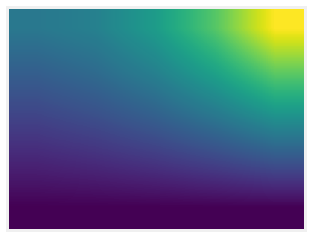

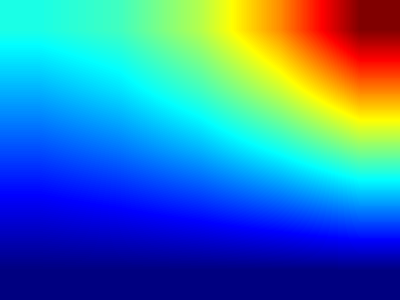

In [ ]:
#Función para realizar dos tipos de graficas de calor que nos permitan visualizar la difusion.
def heap_map(sol):
    heatmap = cv2.resize(sol, (400,300))
    plt.matshow(heatmap)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    heatmapshow = None
    heatmapshow = cv2.normalize(heatmap, heatmapshow, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    heatmapshow = cv2.applyColorMap(heatmapshow, cv2.COLORMAP_JET)
    cv2_imshow(heatmapshow)
    cv2.waitKey(0)

heap_map(ordenamosplaca(resultado, y0, y0, izquierda_full,derecha_full,arriba, abajo ))

###Pruebas

####  Con deltas distintas

Con deltax =0.1 y deltay = 0.2

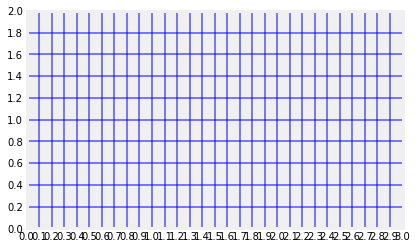

In [ ]:
# Parametros iniciales
x1 = 0
xn = 3
y1 = 0
yn = 2
deltax = 0.1
deltay = 0.2
rows = 9
column = 29
n = 261

# Malla
malla(x1, xn, y1, yn, deltax, deltay)

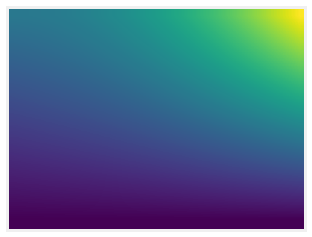

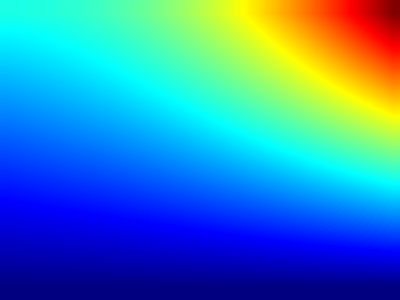

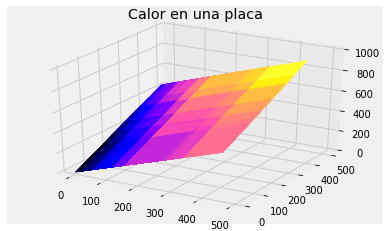

In [ ]:
# Condiciones de frontera
x = np.arange(deltax, xn, deltax)
y = np.arange(deltay, yn, deltay)
izquierda = front_izquierda(y)
derecha = front_derecha(y)
abajo = front_abajo(x)
arriba = front_arriba(x)


# Solucion al sistema
#Vector
v = vector(n, rows, arriba, abajo, izquierda, derecha, deltax, deltay)
#Matriz
m=sist(deltax, deltay,n,rows) 
m=np.hstack((m,np.atleast_2d(v).T))
#Solucion
res8 = gauss(m)


# Ordenando la placa
x = np.arange(x1, xn+ deltax, deltax)
y = np.arange(y1, yn+deltay, deltay)
izquierda_full = izquierda[::-1]
derecha_full = derecha[::-1]
abajo = front_abajo(x)
arriba = front_arriba(x)

# plots
placa1 = ordenamosplaca(res8, rows, column, izquierda_full, derecha_full, arriba, abajo )
heap_map(placa1)
plot_placa(placa1)


#### Diferentes condiciones de frontera

Cambiaremos las condiciones de frontera para observar que sucedera.

In [ ]:
#Condiciones de frontera
def front_arriba_new(x):
    return 200+(100*x)

def front_abajo_new(x):
    return np.zeros(len(x))

def front_derecha_new(y):
    return 100*y

def front_izquierda_new(y):
    return 100*y



Con delta = 0.1

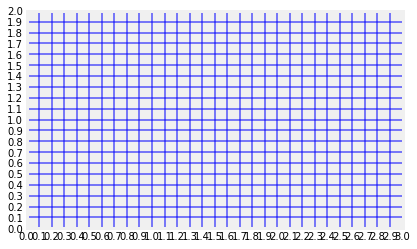

In [ ]:
# Parametros iniciales
x1 = 0
xn = 3
y1 = 0
yn = 2
deltax = 0.1
deltay = 0.1
rows = 19
column = 29
n = 551

# Malla
malla(x1, xn, y1, yn, deltax, deltay)

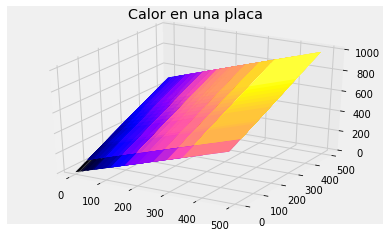

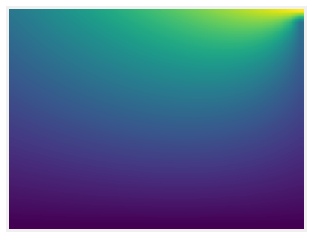

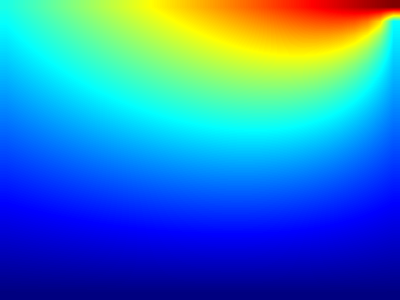

In [ ]:
# Condiciones de frontera
x = np.arange(deltax, xn, deltax)
y = np.arange(deltay, yn, deltay)
izquierda = front_izquierda_new(y)
derecha = front_derecha_new(y)
abajo = front_abajo_new(x)
arriba = front_arriba_new(x)

# Solucion al sistema
v = vector(n, rows, arriba, abajo, izquierda, derecha, deltax, deltay)
m=sist(deltax, deltay,n,rows) 
res3 = np.linalg.solve(m,v).tolist()

# Ordenando la placa
x = np.arange(x1, xn+ deltax, deltax)
y = np.arange(y1, yn+deltay, deltay)
izquierda_full = izquierda[::-1]
derecha_full = derecha[::-1]
abajo = front_abajo_new(x)
arriba = front_arriba_new(x)

# plots
placa2 = ordenamosplaca(res3, rows, column, izquierda_full, derecha_full, arriba, abajo )
plot_placa(placa2)
heap_map(placa2)


## Referencias
Para profundizar en los temas tratados en el presente documento se pueden consultar las siguientes fuentes:



*  	Joe D. Hoffman, Marcel Dekker Inc., Numerical Methods for Engineers and Scientist Second Edition 2001.

